# College Admission Classification Labwork

Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)

Using pandas, load "College Admission Train Data.csv"

In [2]:
filename = "../data/college-admission-test/College-Admission-Train-Data.csv"
df = pd.read_csv(filename, sep=',')
print(f"File loaded : {filename}")
display(df.head())

File loaded : ../data/college-admission-test/College-Admission-Train-Data.csv


,Exam1,Exam2,Decision
0,8.50,16.92,1
1,8.95,13.60,1
2,15.90,10.50,1
3,13.44,13.47,1
4,7.14,6.09,0


---

In this section, we will ignore the previous jury decision.


Plot the dataset using scores only :

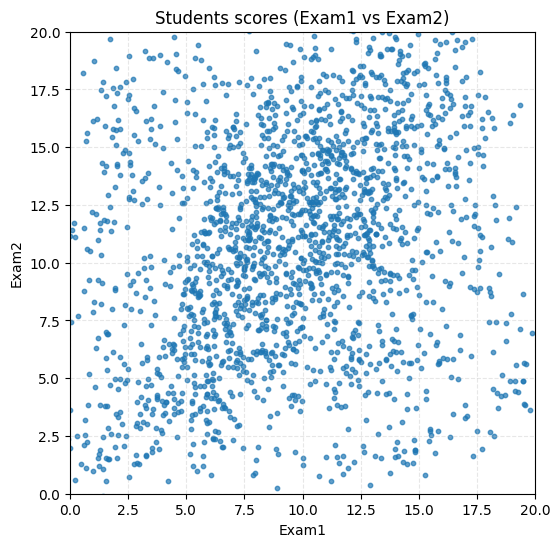

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(df['Exam1'], df['Exam2'], s=10, alpha=0.7, color='tab:blue')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Students scores (Exam1 vs Exam2)')
plt.xlim(0,20)
plt.ylim(0,20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Compute the decision for each student (admitted if mean > 10) and store it in an array named decision:

In [4]:
# Compute the mean of Exam1 and Exam2 for each student
mean_scores = (df['Exam1'] + df['Exam2']) / 2

# Create decision array: 1 (admitted) if mean > 10, else 0 (not admitted)
decision = (mean_scores > 10).astype(int)

# Display some statistics
print(f"Total students: {len(decision)}")
print(f"Admitted (mean > 10): {decision.sum()}")
print(f"Not admitted (mean <= 10): {(decision == 0).sum()}")
print(f"\nFirst 10 decisions:")
print(decision[:10].values)

# Optional: Add the decision and mean scores to the dataframe for reference
df['Mean_Score'] = mean_scores
df['Decision_with_Mean'] = decision

# Display first few rows with the new columns
display(df.head(10))

Total students: 2000
Admitted (mean > 10): 1056
Not admitted (mean <= 10): 944

First 10 decisions:
[1 1 1 1 0 0 0 1 1 1]


,Exam1,Exam2,Decision,Mean_Score,Decision_with_Mean
0,8.50,16.92,1,12.710,1
1,8.95,13.60,1,11.275,1
2,15.90,10.50,1,13.200,1
3,13.44,13.47,1,13.455,1
4,7.14,6.09,0,6.615,0
5,10.05,6.83,0,8.440,0
6,2.44,11.54,0,6.990,0
7,3.88,19.00,1,11.440,1
8,8.73,15.08,1,11.905,1
9,10.46,12.53,1,11.495,1


Plot the dataset using decision as color :

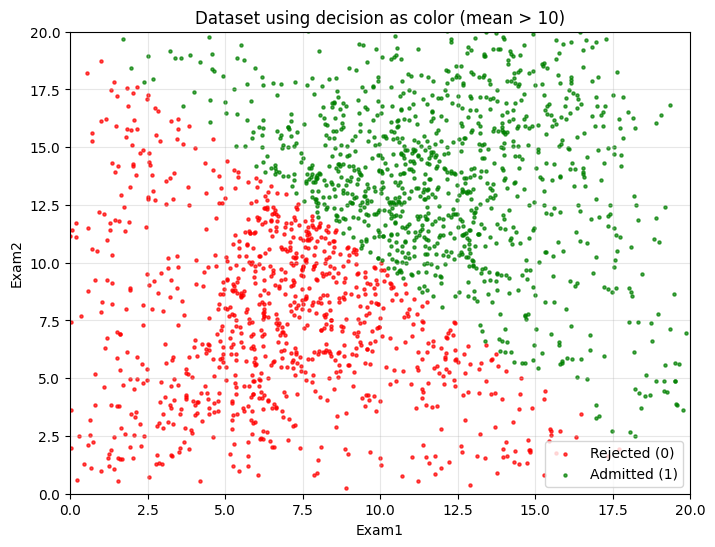

In [5]:
# Graphique avec la décision comme couleur
plt.figure(figsize=(8, 6))
colors = ['r', 'g']
labels = ['Rejected (0)', 'Admitted (1)']
for i in [0, 1]:
    mask = decision == i
    plt.scatter(df['Exam1'][mask], df['Exam2'][mask], 
                c=colors[i], label=labels[i], s=5, alpha=0.7)
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Dataset using decision as color (mean > 10)')
plt.legend()
plt.xlim(0,20)
plt.ylim(0,20)
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
def plot_decision_boundary(input_data, decision, x_min=0, x_max=20, y_min=0, y_max=20, plot_step=0.05):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = (xx.ravel() + yy.ravel()) / 2 > 10
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")
    plt.axis([x_min, x_max, y_min, y_max])
    plt.scatter(input_data['Exam1'], input_data['Exam2'], s=2, c=decision, cmap="prism")
    plt.show()

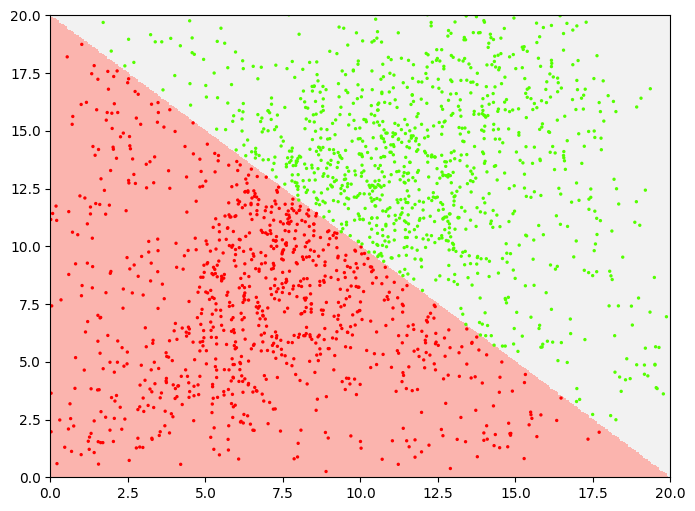

In [7]:
# Plot decision boundaries with data points
# Point colors represent the ACTUAL jury decision (not the algorithm)
plt.figure(figsize=(8, 6))
plot_decision_boundary(df, decision)  # Use the actual jury decision for color

Plot the dicision boundaries and the data points (Apply class color from the dataset decision) :

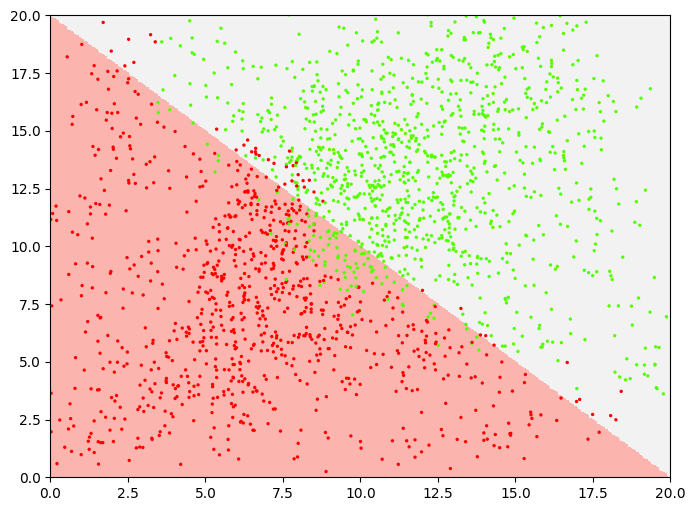

In [8]:
# Graphique des frontières de décision avec les points de données
# Les couleurs des points représentent la VRAIE décision du jury (pas l'algorithme)
plt.figure(figsize=(8, 6))
plot_decision_boundary(df, df['Decision'])  # Utiliser la vraie décision du jury pour la couleur


What is the algorithm decision accuracy related to the jury decision ??

In [9]:


# Store the jury's actual decision
jury_decision = df['Decision'].values

# Compute the algorithm's decision (mean > 10)
mean_scores = (df['Exam1'] + df['Exam2']) / 2
algorithm_decision = (mean_scores > 10).astype(int)

# Compute accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(jury_decision, algorithm_decision)
print(f"Algorithm Decision Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(jury_decision, algorithm_decision)
print("\nConfusion Matrix:")
print(cm)
print("\nConfusion Matrix explanation:")
print(f"True Negatives (correctly rejected): {cm[0,0]}")
print(f"False Positives (wrongly admitted): {cm[0,1]}")
print(f"False Negatives (wrongly rejected): {cm[1,0]}")
print(f"True Positives (correctly admitted): {cm[1,1]}")

# Classification Report
print("\nClassification Report:")
print(classification_report(jury_decision, algorithm_decision, target_names=['Not Admitted', 'Admitted']))

# Update dataframe properly
df['Mean_Score'] = mean_scores
df['Algorithm_Decision'] = algorithm_decision


Algorithm Decision Accuracy: 0.9290 (92.90%)

Confusion Matrix:
[[ 846   44]
 [  98 1012]]

Confusion Matrix explanation:
True Negatives (correctly rejected): 846
False Positives (wrongly admitted): 44
False Negatives (wrongly rejected): 98
True Positives (correctly admitted): 1012

Classification Report:
              precision    recall  f1-score   support

Not Admitted       0.90      0.95      0.92       890
    Admitted       0.96      0.91      0.93      1110

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



# Linear Discriminant Analysis

Create and fit the model

In [10]:
X_train = df[['Exam1', 'Exam2']]
y_train = df['Decision']

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

print(f"Classes: {lda_model.classes_}")

Classes: [0 1]


Display the data and the decision boundaries 

In [11]:
def plot_model_decision_boundary(model, input_data, x_min=0, x_max=20, y_min=0, y_max=20, plot_step=0.1):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")
    plt.axis([x_min, x_max, y_min, y_max])
    plt.scatter(input_data['Exam1'], input_data['Exam2'], s=2, c=input_data['Decision'], cmap="prism")
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


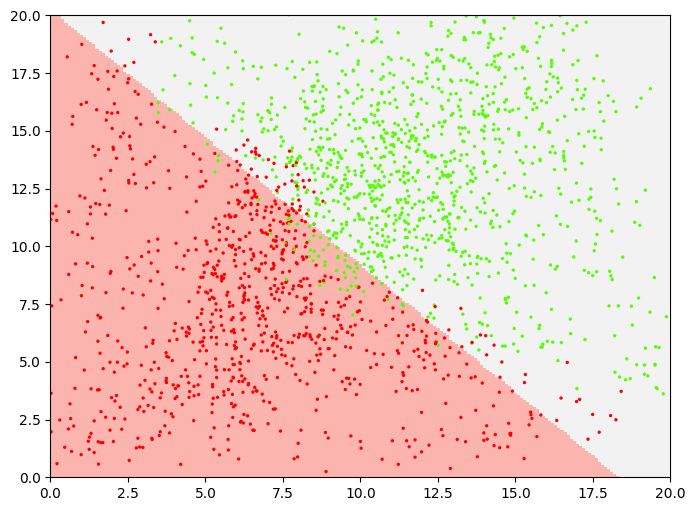

In [12]:
plt.figure(figsize=(8, 6))
plot_model_decision_boundary(lda_model, df)

Measure the accuracy of your model

In [13]:
lda_predictions = lda_model.predict(X_train)
lda_accuracy = accuracy_score(y_train, lda_predictions)

print(f"Précision du modèle LDA: {lda_accuracy:.4f}")
print(f"Pourcentage de précision LDA: {lda_accuracy*100:.2f}%")

Précision du modèle LDA: 0.9370
Pourcentage de précision LDA: 93.70%


# Quadratic Discriminant Analysis

In [14]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

print(f"Classes: {qda_model.classes_}")

Classes: [0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


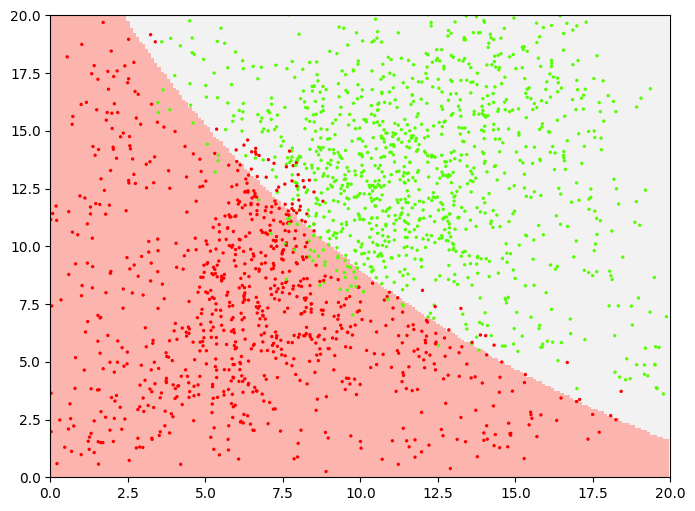

In [15]:
plt.figure(figsize=(8, 6)),
plot_model_decision_boundary(qda_model, df)

In [16]:
qda_predictions = qda_model.predict(X_train)
qda_accuracy = accuracy_score(y_train, qda_predictions)

print(f"Précision du modèle QDA: {qda_accuracy:.4f}")
print(f"Pourcentage de précision QDA: {qda_accuracy*100:.2f}%")

Précision du modèle QDA: 0.9445
Pourcentage de précision QDA: 94.45%


---
# Decisision Tree Classifier

In [17]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)

print(f"Profondeur de l'arbre: {dt_model.get_depth()}")
print(f"Nombre de feuilles: {dt_model.get_n_leaves()}")

Profondeur de l'arbre: 4
Nombre de feuilles: 15


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


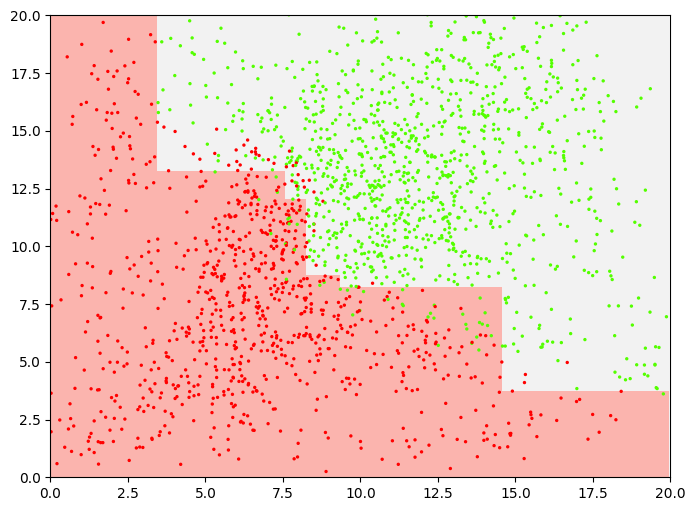

In [18]:
plt.figure(figsize=(8, 6))
plot_model_decision_boundary(dt_model, df)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree accuracy: 0.9590


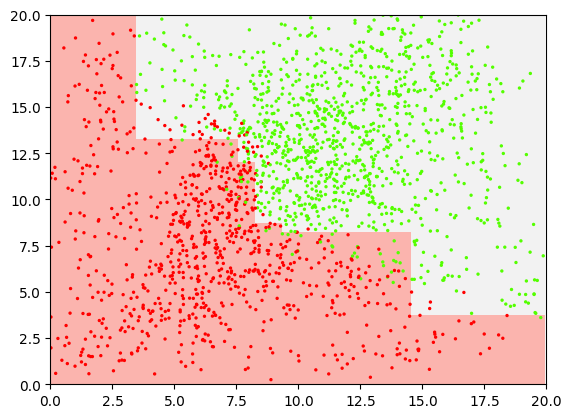

In [19]:
dt_predictions = dt_model.predict(X_train)
dt_accuracy = accuracy_score(y_train, dt_predictions)

print(f"Decision Tree accuracy: {dt_accuracy:.4f}")
plot_model_decision_boundary(dt_model, df)

---

# Create a K-Nearest Neighbors Classifier (KNN)

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("KNN model trained successfully")
print(f"Number of neighbors: {knn_model.n_neighbors}")

KNN model trained successfully
Number of neighbors: 5


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


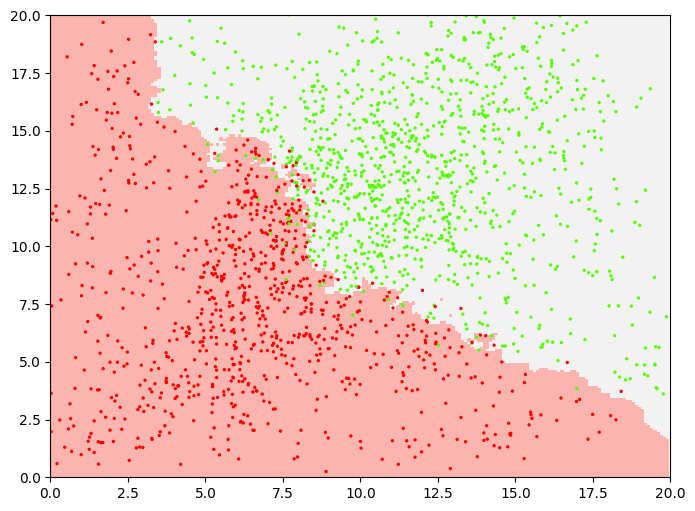


Précision du modèle KNN: 0.9655
Pourcentage de précision KNN: 96.55%


In [21]:
plt.figure(figsize=(8, 6))
plot_model_decision_boundary(knn_model, df)

knn_predictions = knn_model.predict(X_train)
knn_accuracy = accuracy_score(y_train, knn_predictions)
print(f"\nPrécision du modèle KNN: {knn_accuracy:.4f}")
print(f"Pourcentage de précision KNN: {knn_accuracy*100:.2f}%")

# Random Forest

In [22]:
# Create and train the Random Forest model with optimized parameters
rf_model = RandomForestClassifier(
    n_estimators=200,        # More trees for better accuracy
    max_depth=10,            # Control depth to avoid overfitting
    min_samples_split=5,     # Minimum samples to split a node
    min_samples_leaf=2,      # Minimum samples in a leaf
    max_features='sqrt',     # Use sqrt of number of features
    bootstrap=True,          # Use bootstrap
    random_state=42          # For reproducibility
)
rf_model.fit(X_train, y_train)
print("Optimized Random Forest model trained successfully")
print(f"Number of trees: {rf_model.n_estimators}")
print(f"Maximum depth: {rf_model.max_depth}")

Optimized Random Forest model trained successfully
Number of trees: 200
Maximum depth: 10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


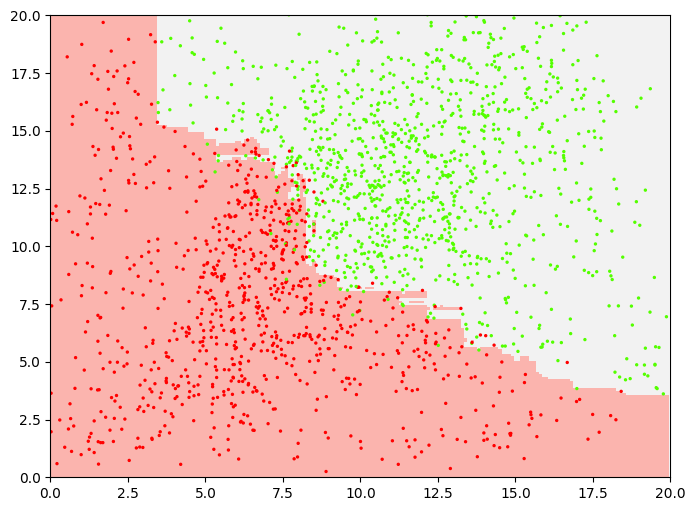

Random Forest accuracy: 0.9855


In [23]:
plt.figure(figsize=(8, 6))
plot_model_decision_boundary(rf_model, df)

rf_predictions = rf_model.predict(X_train)
rf_accuracy = accuracy_score(y_train, rf_predictions)
print(f"Random Forest accuracy: {rf_accuracy:.4f}")


---

Load 'College Admission Test Data.csv'

In [24]:
test_data = pd.read_csv("../data/college-admission-test/College Admission Test Data.csv", sep=',')
print("Shape of the test dataset:", test_data.shape)
display(test_data.head())

X_test = test_data[['Exam1', 'Exam2']]
y_test = test_data['Decision']

Shape of the test dataset: (1000, 3)


,Exam1,Exam2,Decision
0,13.71,18.10,1
1,12.51,12.62,1
2,14.98,19.56,1
3,3.64,16.64,1
4,7.17,8.44,0


Compute and print the accuracy of all models on test data

In [25]:
# Calculate and display the accuracy of all models on test data
models = {
    'Linear Discriminant Analysis': lda_model,
    'Quadratic Discriminant Analysis': qda_model,
    'Decision Tree': dt_model,
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model
}

print("ACCURACY ON TEST DATA\n")
test_accuracies = {}
for name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_accuracies[name] = accuracy
    print(f"{name:<30}: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Also calculate the accuracy of the simple algorithm (mean > 10) on test data
simple_decision = ((test_data['Exam1'] + test_data['Exam2']) / 2 > 10).astype(int)
simple_accuracy = accuracy_score(y_test, simple_decision)
print(f"{'Simple algorithm (mean > 10)':<30}: {simple_accuracy:.4f} ({simple_accuracy*100:.2f}%)")

best_model = max(test_accuracies, key=test_accuracies.get)
print(f"\nBest model: {best_model} with {test_accuracies[best_model]*100:.2f}% accuracy")

ACCURACY ON TEST DATA

Linear Discriminant Analysis  : 0.9380 (93.80%)
Quadratic Discriminant Analysis: 0.9590 (95.90%)
Decision Tree                 : 0.9430 (94.30%)
K-Nearest Neighbors           : 0.9610 (96.10%)
Random Forest                 : 0.9610 (96.10%)
Simple algorithm (mean > 10)  : 0.9330 (93.30%)

Best model: K-Nearest Neighbors with 96.10% accuracy
